In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for all plots
sns.set_style("whitegrid")

- 1. Initial load & data quality check
- 2. Explore target variable (`loan_approved`)
- 3. Univariate analysis of the features
- 4. Bivariate Analysis (Features vs. Target)
- 5. Multivariate Analysis (Feature Correlation)

## 1. Initial load & data quality check

In [20]:
# Load the dataset
try:
    loan_df = pd.read_csv("../data/loan-approval-dataset/loan_approval.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'loan_approval.csv' not found. Please check the file path.")
    assert False, "File not found"

# Clean column names (remove leading/trailing spaces)
loan_df.columns = loan_df.columns.str.strip()

loan_df.head()

Data loaded successfully.


,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [5]:
loan_df.info()
loan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


In [21]:
print("--- Missing Values ---")
print(loan_df.isnull().sum())

print("\n--- Duplicate Rows ---")
print(f"Found {loan_df.duplicated().sum()} duplicate rows.")

--- Missing Values ---
name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

--- Duplicate Rows ---
Found 0 duplicate rows.


In [22]:
loan_df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


## 2. Explore target variable (loan_approved)

For model training, it is helpful to know if the dataset is **balanced** (e.g., 50% Yes, 50% No) or **imbalanced** (e.g., 90% Yes, 10% No).
--- Target Variable Distribution ---
loan_approved
False    0.5605
True     0.4395
Name: proportion, dtype: float64


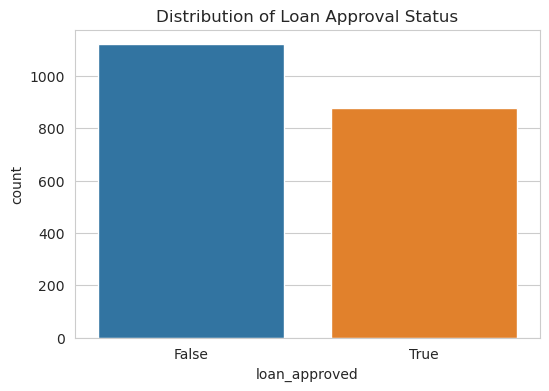

In [23]:
print("For model training, it is helpful to know if the dataset is **balanced** (e.g., 50% Yes, 50% No) or **imbalanced** (e.g., 90% Yes, 10% No).")

print("--- Target Variable Distribution ---")
print(loan_df['loan_approved'].value_counts(normalize=True))

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(
    x='loan_approved',
    data=loan_df,
    hue='loan_approved',
    legend=False
)
plt.title('Distribution of Loan Approval Status')
plt.show()

## 3. Univariate Analysis (Analyzing Each Feature)

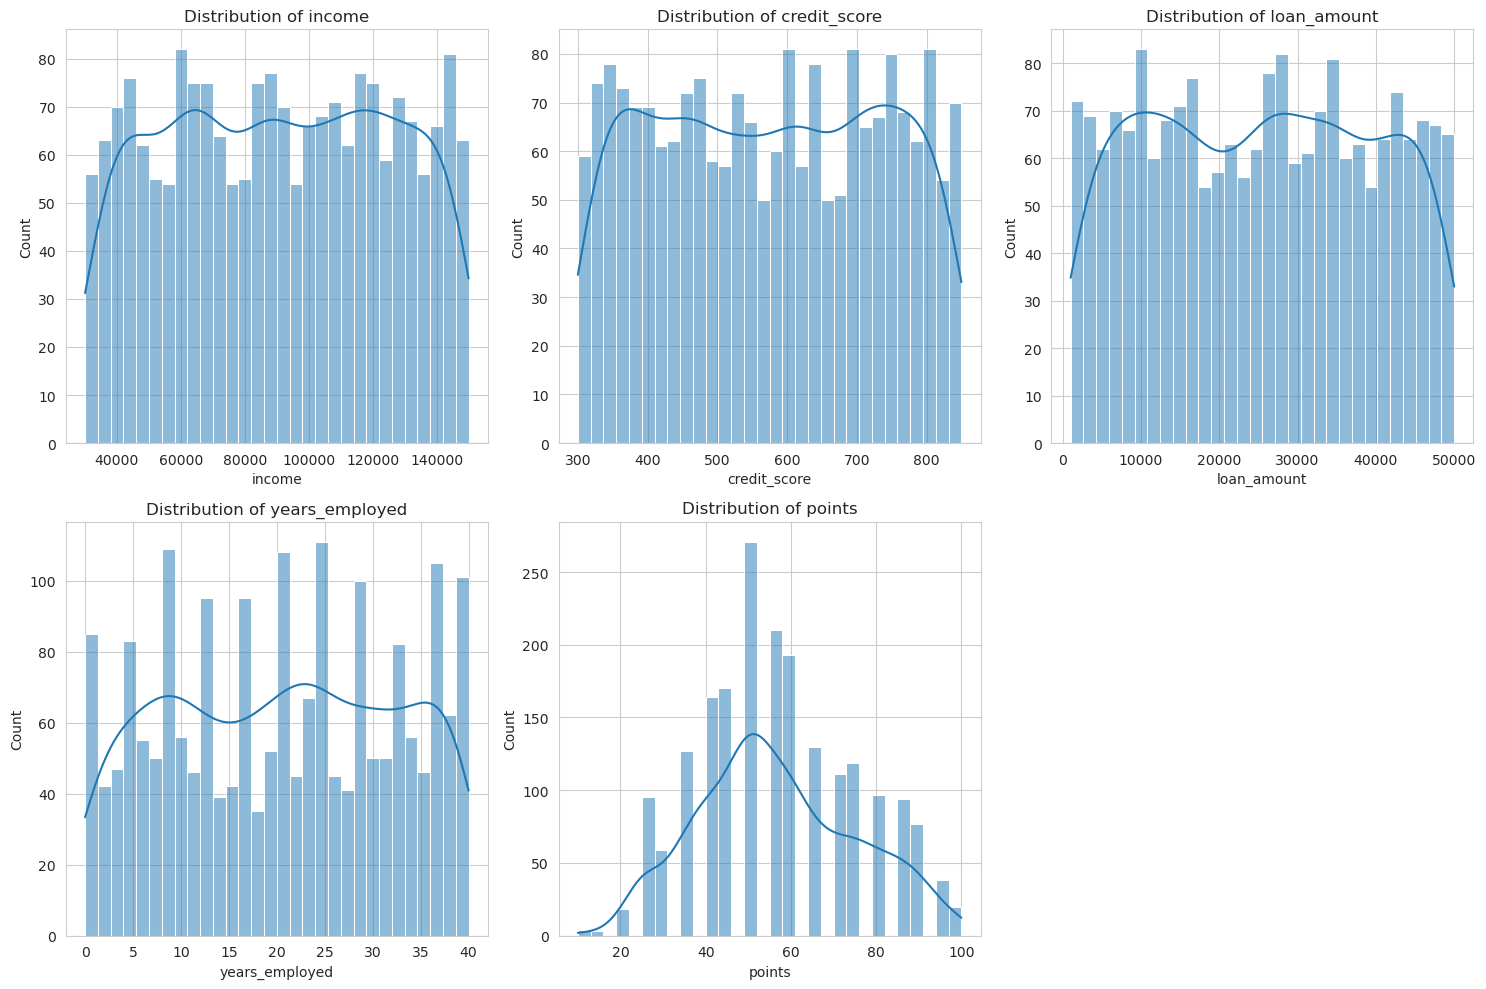

In [25]:
numerical_features = ['income', 'credit_score', 'loan_amount', 'years_employed', 'points']

# Plot histograms to see distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(loan_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

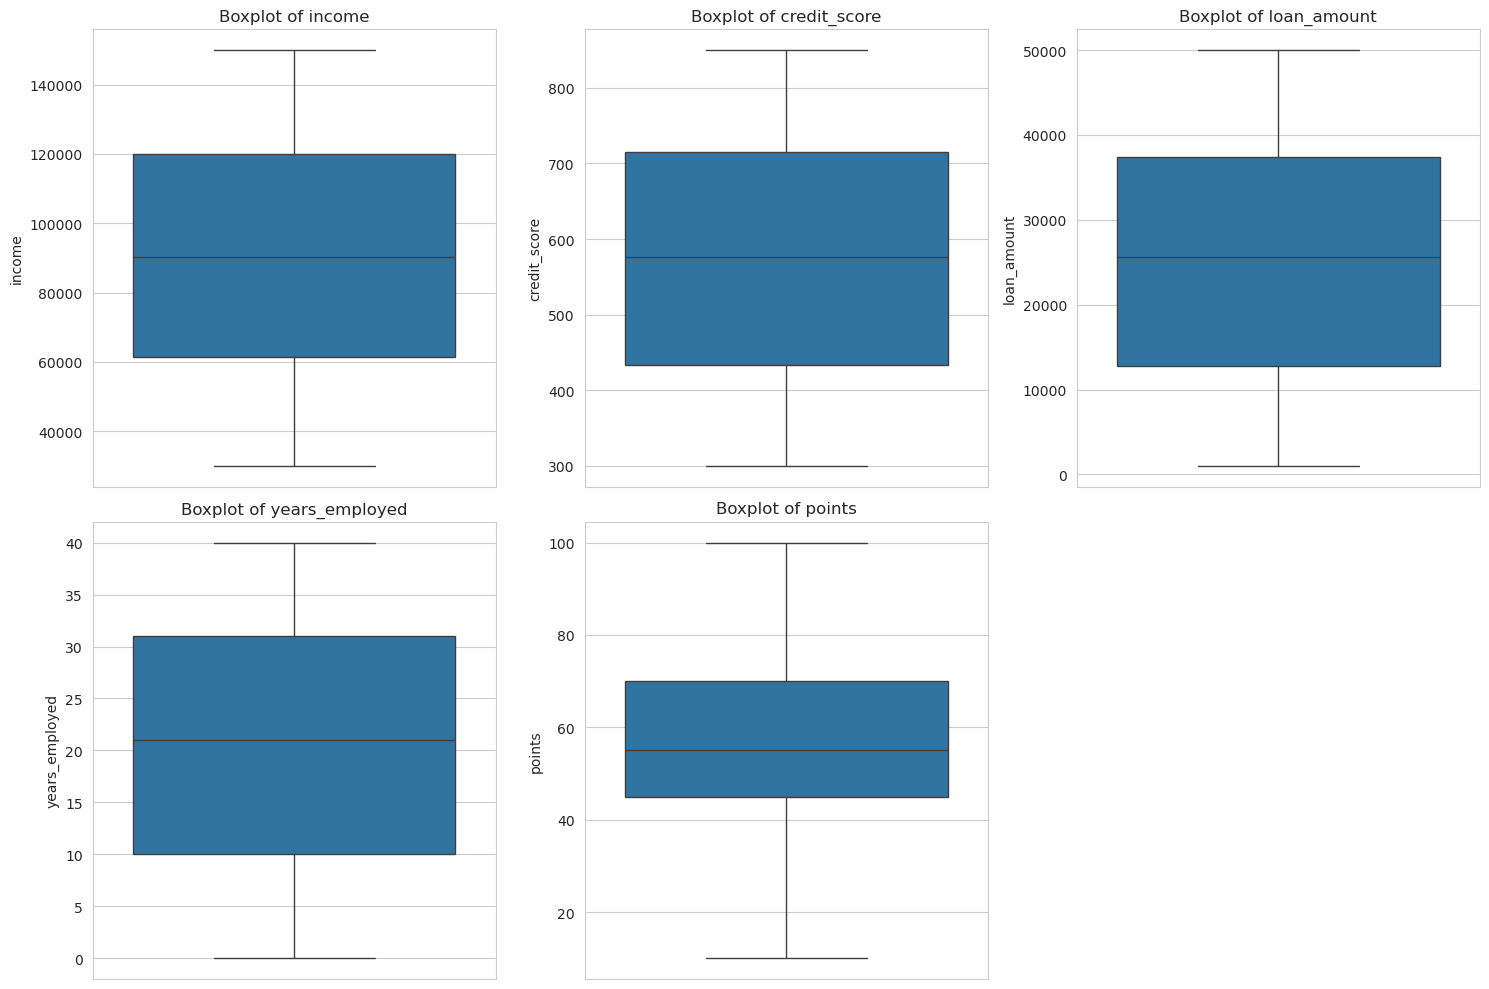

In [26]:
# Plot boxplots to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=loan_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [44]:
categorical_features = ['city']

print(f"Total unique cities: {loan_df['city'].nunique()}")
print("\nTop 15 most frequent cities:")
print(loan_df['city'].value_counts().head(15))

print("\nMedian & Mean count of cities:")
print(f"Median: {loan_df['city'].value_counts().median()}")
print(f"Mean: {loan_df['city'].value_counts().mean():.4}")

Total unique cities: 1882

Top 15 most frequent cities:
city
North Joseph        4
Williamsstad        3
Port Christopher    3
Port Michael        3
Leeland             3
West Melissa        3
East Mary           3
North David         3
Christinachester    3
North Michael       3
West Elizabeth      3
Port Jessica        2
Chaseberg           2
West Melanie        2
North Jeffery       2
Name: count, dtype: int64

Median & Mean count of cities:
Median: 1.0
Mean: 1.063


## 4. Bivariate Analysis (Features vs. Target)

How does each feature relate to `loan_approved`?

In [63]:
# Create a numeric version of the target for easier calculations
loan_df['loan_approved_numeric'] = loan_df['loan_approved'].apply(lambda x: 1 if x == True else 0)

Numerical features vs. Loan Approval...


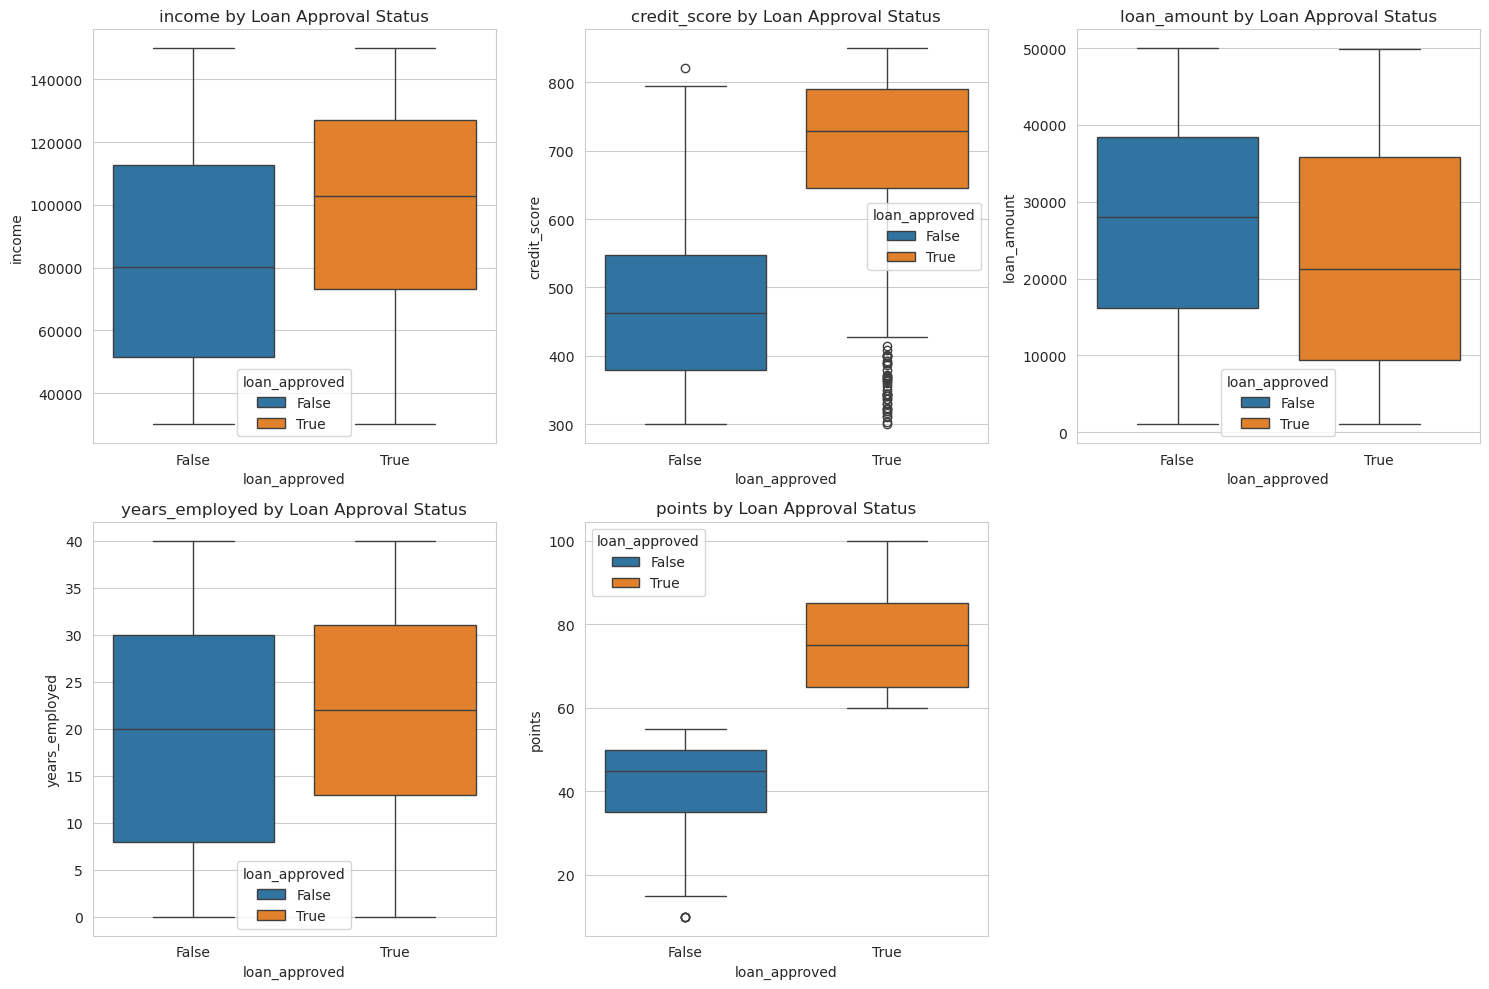

In [64]:
print("Numerical features vs. Loan Approval...")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='loan_approved', y=col, data=loan_df, hue='loan_approved')
    plt.title(f'{col} by Loan Approval Status')
plt.tight_layout()
plt.show()

Categorical features vs. Loan Approval...


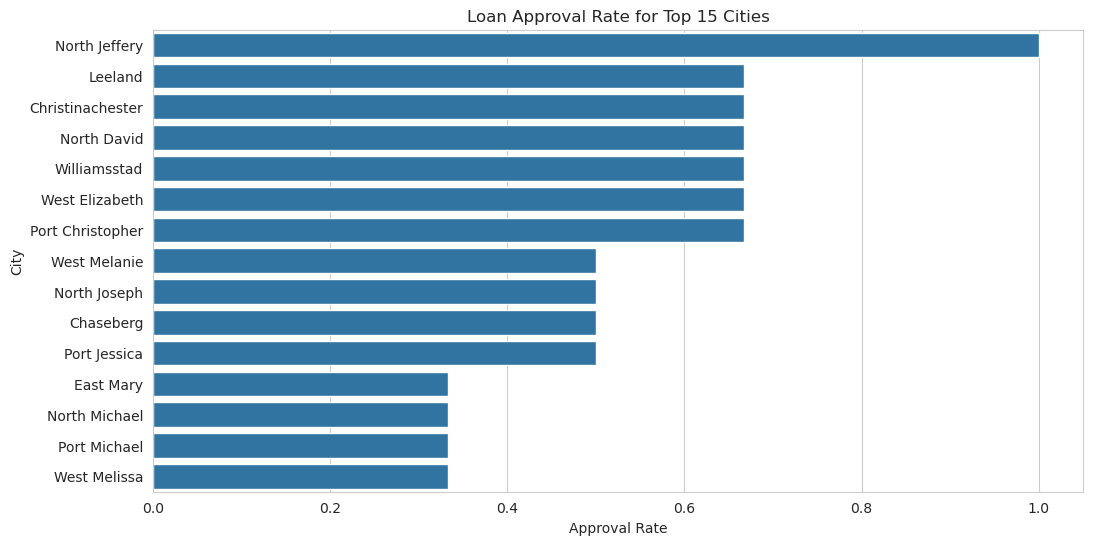

In [65]:
print("Categorical features vs. Loan Approval...")

# Get top 15 cities by count
top_15_cities = loan_df['city'].value_counts().head(15).index
df_top_cities = loan_df[loan_df['city'].isin(top_15_cities)]

# Calculate approval rate for these cities
city_approval_rate = df_top_cities.groupby('city')['loan_approved_numeric'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='loan_approved_numeric', y='city', data=city_approval_rate, orient='h')
plt.title('Loan Approval Rate for Top 15 Cities')
plt.xlabel('Approval Rate')
plt.ylabel('City')
plt.show()

## 5. Multivariate Analysis (Feature Correlation)

Finally, let's see how the numerical features relate to each other. This is useful for checking **multicollinearity** (features that are highly correlated with each other).

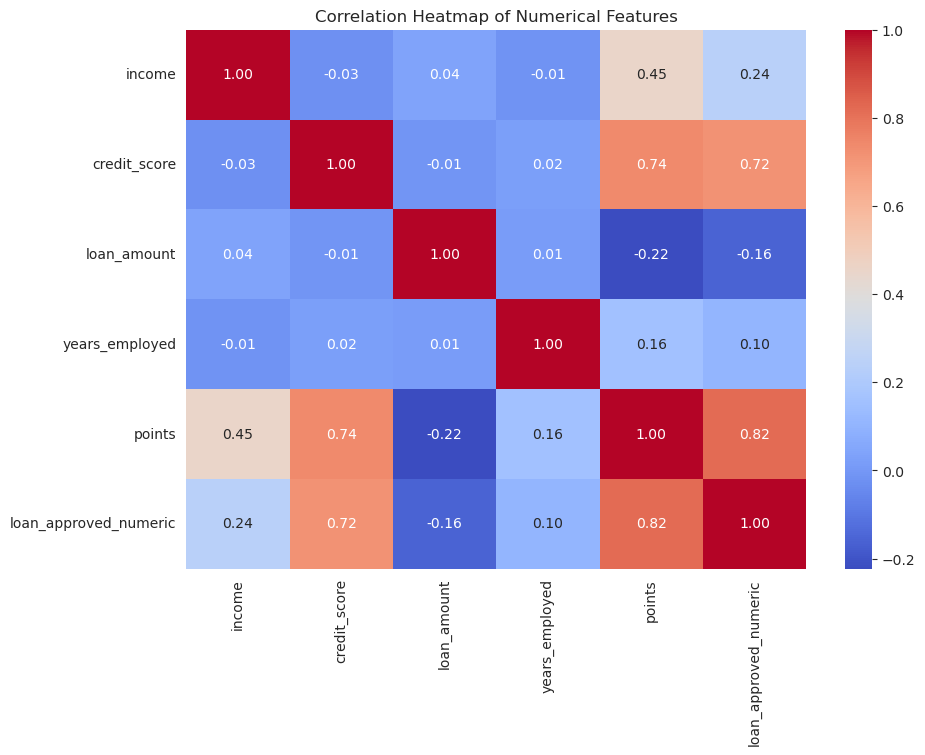

--- Correlation with Target (loan_approved_numeric) ---
loan_approved_numeric    1.000000
points                   0.821415
credit_score             0.715788
income                   0.238066
years_employed           0.104408
loan_amount             -0.157859
Name: loan_approved_numeric, dtype: float64


In [71]:
numerical_df = loan_df[numerical_features + ['loan_approved_numeric']]

plt.figure(figsize=(10, 7))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

print("--- Correlation with Target (loan_approved_numeric) ---")
print(correlation_matrix['loan_approved_numeric'].sort_values(ascending=False))

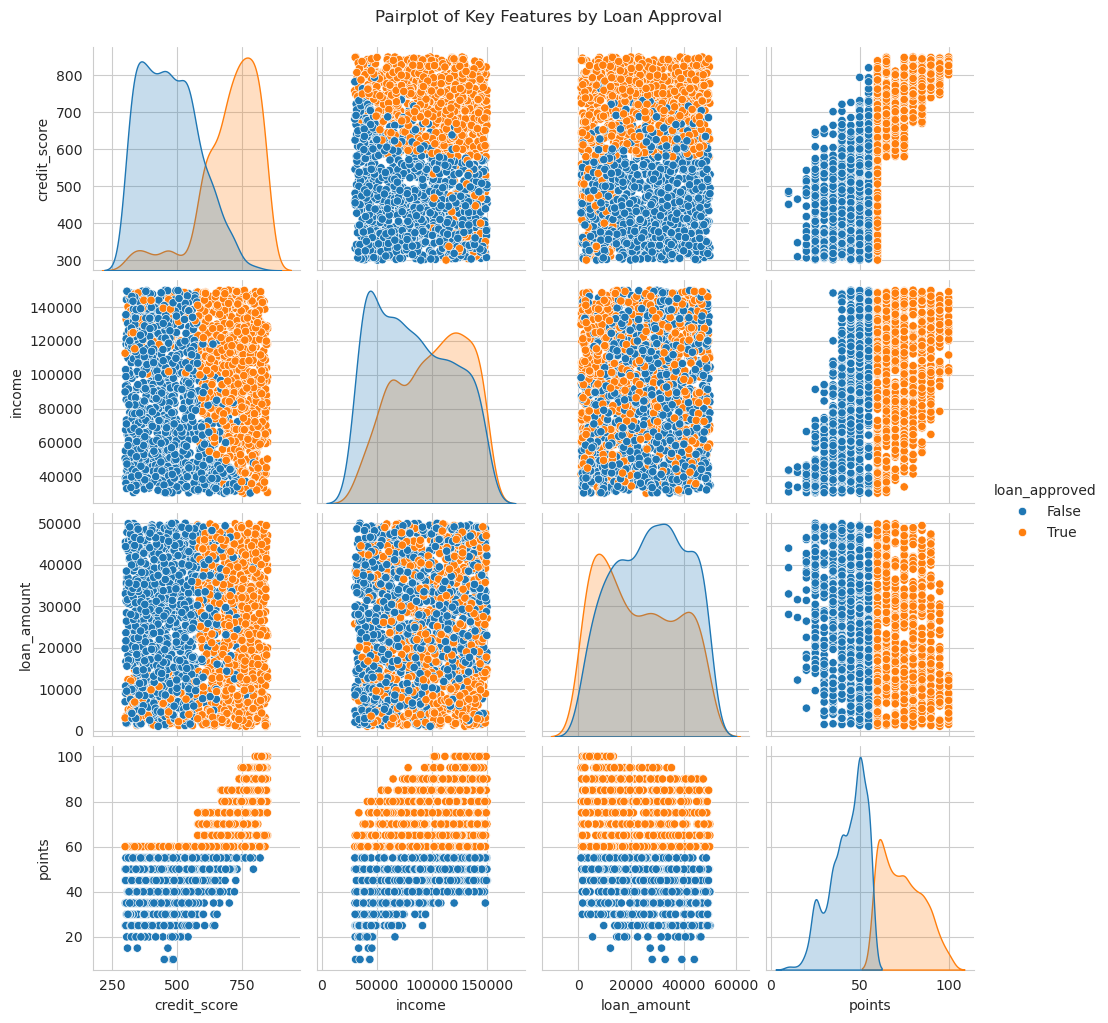

In [74]:
# A pairplot shows scatterplots for all features against each other, colored by the target
key_features = ['credit_score', 'income', 'loan_amount', 'points', 'loan_approved']
sns.pairplot(loan_df[key_features], hue='loan_approved')
plt.suptitle('Pairplot of Key Features by Loan Approval', y=1.02)
plt.show()

The EDA is now complete. We have identified:
* The dataset is perfectly balanced.
* The `name` column could be used to identify the gender but that was ignored.
* `credit_score` and `points` are the most important predictors. `credit_score` has a strong positive correlation, and `points` has a strong negative one.
* `income` and `years_employed` have a moderate positive correlation with approval.
* `loan_amount` has a slight negative correlation.
* `city` does not appear to be a strong predictor, as approval rates are similar across the top cities.